# WeatherPy
----

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint


# Import API key
#weather1_url=('https://api.openweathermap.org/data/2.5/onecall?lat={lat}&lon={lon}&appid={YOUR API KEY}')
#weather_url=('https://api.openweathermap.org/data/2.5/weather?q={city name}&appid={your api key}')
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# df for information

column_names1 = ["city", "lat", "long", "country"]
city_info_df = pd.DataFrame(columns = column_names1)
city_info_df.info()

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

         
# Print the city count to confirm sufficient count
len(cities)

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   city     0 non-null      object
 1   lat      0 non-null      object
 2   long     0 non-null      object
 3   country  0 non-null      object
dtypes: object(4)
memory usage: 0.0+ bytes


620

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [12]:
print('Beginning Data Retrieval')
print('-----------------------------')

for i in range(len(cities)):
    weather_url=(f'https://api.openweathermap.org/data/2.5/weather?q={cities[i]}&appid={weather_api_key}')
#    print(weather_url)
    resp = requests.get(weather_url)
    response = resp.json()
 
    if resp.status_code != 200:
        print('City not found. Skipping...')
    else:
        print(f'Processing Record {i+1} | {cities[i]}')
        city_info_df.loc[i,'cloudiness'] = response['clouds']['all']
        city_info_df.loc[i,'date'] = response['dt']
        city_info_df.loc[i,'humidity'] = response['main']['humidity']
        calc_max_temp = response['main']['temp_max']
        calc_max_temp = calc_max_temp - 273.15
        city_info_df.loc[i,'max_temp'] = calc_max_temp * 9 / 5 + 32 
        city_info_df.loc[i,'wind_speed'] = response['wind']['speed']
        city_info_df.loc[i,'lat'] = response['coord']['lat']
        city_info_df.loc[i,'long'] = response['coord']['lon']
        city_info_df.loc[i,'city'] = response['name']
        city_info_df.loc[i,'country'] = response['sys']['country']

print('-----------------------------')
print('Data Retrieval Complete')  
print('-----------------------------')

Beginning Data Retrieval
-----------------------------
Processing Record 1 | east london
Processing Record 2 | nikolskoye
Processing Record 3 | port elizabeth
Processing Record 4 | hermanus
Processing Record 5 | fonte boa
Processing Record 6 | port alfred
Processing Record 7 | vaini
Processing Record 8 | cabo san lucas
Processing Record 9 | ballina
Processing Record 10 | bredasdorp
Processing Record 11 | starogard gdanski
Processing Record 12 | buraydah
Processing Record 13 | alta floresta
Processing Record 14 | kodiak
Processing Record 15 | dunedin
Processing Record 16 | barrow
Processing Record 17 | mataura
Processing Record 18 | alofi
Processing Record 19 | okha
Processing Record 20 | chuy
Processing Record 21 | semnan
Processing Record 22 | caravelas
Processing Record 23 | gbarnga
Processing Record 24 | albany
Processing Record 25 | santa cruz
Processing Record 26 | circleville
Processing Record 27 | praia da vitoria
Processing Record 28 | bluff
Processing Record 29 | hobart
Proces

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [13]:
city_info_df.to_csv(output_data_file, index=False) 
city_info_df = city_info_df.reset_index()

In [14]:
city_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 562 entries, 0 to 561
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       562 non-null    int64  
 1   city        562 non-null    object 
 2   lat         562 non-null    object 
 3   long        562 non-null    object 
 4   country     562 non-null    object 
 5   cloudiness  562 non-null    float64
 6   date        562 non-null    float64
 7   humidity    562 non-null    float64
 8   max_temp    562 non-null    float64
 9   wind_speed  562 non-null    float64
dtypes: float64(5), int64(1), object(4)
memory usage: 44.0+ KB


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

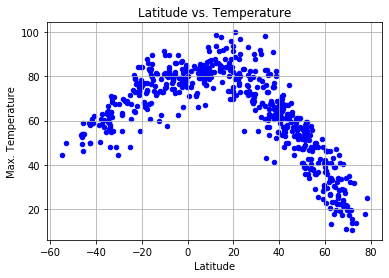

<Figure size 432x288 with 0 Axes>

In [15]:
city_info_df.plot.scatter(x='lat', y='max_temp', c='blue', marker='o')

plt.xlabel("Latitude")
plt.ylabel("Max. Temperature")
plt.title("Latitude vs. Temperature")

plt.grid()

# Save the Figure
plt.savefig("../Images/lat_vs_temp.png")

# Show the Figure
plt.show()
plt.tight_layout();

#### Latitude vs. Humidity Plot

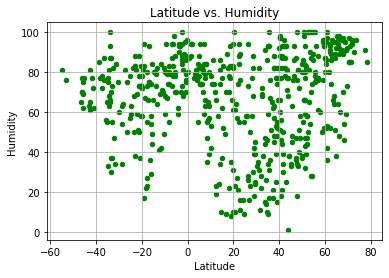

<Figure size 432x288 with 0 Axes>

In [16]:
city_info_df.plot.scatter(x='lat', y='humidity', c='green', marker='o')

plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs. Humidity")

plt.grid()

# Save the Figure
plt.savefig("../Images/lat_vs_humidity.png")

# Show the Figure
plt.show()
plt.tight_layout();

#### Latitude vs. Cloudiness Plot

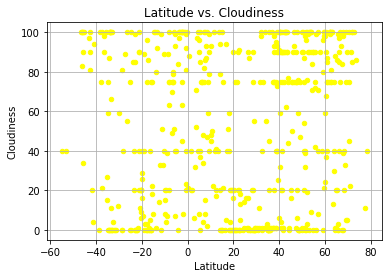

<Figure size 432x288 with 0 Axes>

In [17]:
city_info_df.plot.scatter(x='lat', y='cloudiness', c='yellow', marker='o')

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs. Cloudiness")

plt.grid()

# Save the Figure
plt.savefig("../Images/lat_vs_cloudiness.png")

# Show the Figure
plt.show()
plt.tight_layout();

#### Latitude vs. Wind Speed Plot

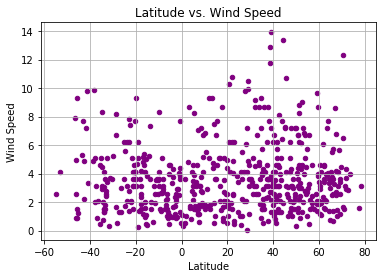

<Figure size 432x288 with 0 Axes>

In [18]:
city_info_df.plot.scatter(x='lat', y='wind_speed', c='purple', marker='o')

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs. Wind Speed")

plt.grid()

# Save the Figure
plt.savefig("../Images/lat_vs_windspeed.png")

# Show the Figure
plt.show()
plt.tight_layout();

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots


In [22]:
# Create Northern and Southern Hemisphere DataFrames
no_city_info_df = city_info_df[(city_info_df['lat'] >= 0)]
no_city_info_df
                               

,index,city,lat,long,country,cloudiness,date,humidity,max_temp,wind_speed
1,1,Nikolskoye,59.7,30.79,RU,21.0,1.588363e+09,52.0,41.000,4.00
7,7,Cabo San Lucas,22.89,-109.91,MX,5.0,1.588364e+09,16.0,96.800,6.20
10,10,Starogard Gdański,53.96,18.53,PL,100.0,1.588364e+09,100.0,48.002,2.76
11,11,Buraidah,26.33,43.98,SA,0.0,1.588364e+09,26.0,80.600,1.00
13,13,Saint Paul Harbor,57.79,-152.41,US,90.0,1.588364e+09,60.0,42.800,1.50
...,...,...,...,...,...,...,...,...,...,...
555,612,Winnemucca,40.97,-117.74,US,1.0,1.588364e+09,18.0,68.000,4.10
557,614,Agnibilékrou,7.13,-3.2,CI,82.0,1.588364e+09,59.0,83.408,1.14
558,615,Edd,13.93,41.69,ER,94.0,1.588364e+09,81.0,85.244,4.74
559,617,Orlik,52.52,99.83,RU,99.0,1.588364e+09,50.0,35.816,1.29


In [23]:
so_city_info_df = city_info_df[(city_info_df['lat'] < 0)]
so_city_info_df

,index,city,lat,long,country,cloudiness,date,humidity,max_temp,wind_speed
0,0,East London,-33.02,27.91,ZA,100.0,1.588364e+09,55.0,68.450,2.42
2,2,Port Elizabeth,-33.92,25.57,ZA,100.0,1.588364e+09,100.0,57.200,1.50
3,3,Hermanus,-34.42,19.23,ZA,0.0,1.588363e+09,81.0,60.998,2.04
4,4,Fonte Boa,-2.5,-66.27,BR,45.0,1.588364e+09,84.0,86.954,0.88
5,5,Port Alfred,-33.59,26.89,ZA,100.0,1.588364e+09,87.0,64.004,1.79
...,...,...,...,...,...,...,...,...,...,...
538,595,Resistencia,-27.46,-58.98,AR,89.0,1.588364e+09,81.0,69.008,1.34
547,604,Kuito,-12.38,16.93,AO,14.0,1.588364e+09,41.0,59.774,0.63
549,606,Arawa,-6.21,155.54,PG,80.0,1.588364e+09,79.0,77.918,1.51
556,613,La Paz,-16.5,-68.15,BO,40.0,1.588363e+09,36.0,60.800,4.60


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression